In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_pickle("./data/data_pkls/nasdaq100.pkl")
df.head()

SPLK                                 FTNT                 ... CSGP  \
           Open High Low Close Adj Close Volume Open High Low Close  ...  Low   
Date                                                                 ...        
1962-01-02  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-03  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-04  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-05  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-08  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   

                                    MU                                  
           Close Adj Close Volume Open High Low Close Adj Close Volume  
Date                                                                    
1962-01-02   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-03   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-04   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-05   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-08   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  

[5 rows x 606 columns]

In [10]:
amd_data = df['AMD']
amd_data.shape

(15618, 6)

In [5]:
amd_data.isnull().sum()

Open         4565
High         4565
Low          4565
Close        4565
Adj Close    4565
Volume       4565
dtype: int64

In [6]:
clean_amd = amd_data.iloc[4565:, :]
clean_amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600.0
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200.0
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200.0
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600.0
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800.0


# Ploting AMD stock trends since 1980

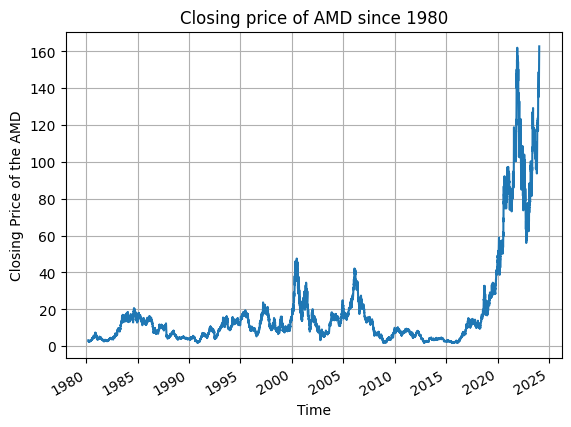

In [7]:
#Plotting the closing price of AMD stock for last one year
clean_amd['Close'].plot()
plt.ylabel('Closing Price of the AMD')
plt.xlabel('Time')
plt.title('Closing price of AMD since 1980')
plt.grid()

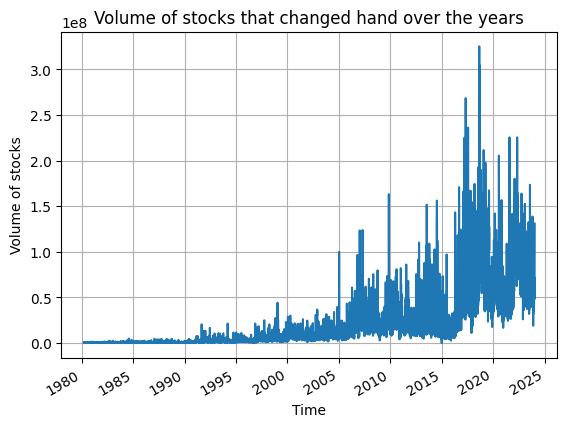

In [8]:
#Plotting the volume of stocks being traded each day for the last year
clean_amd['Volume'].plot()
plt.ylabel('Volume of stocks')
plt.xlabel('Time')
plt.title('Volume of stocks that changed hand over the years')
plt.grid()

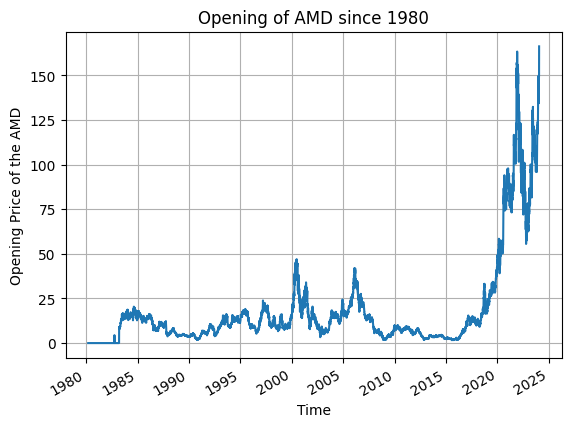

In [9]:
clean_amd['Open'].plot()
plt.ylabel('Opening Price of the AMD')
plt.xlabel('Time')
plt.title('Opening of AMD since 1980')
plt.grid()

In [10]:
clean_amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600.0
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200.0
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200.0
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600.0
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800.0


In [11]:
X = clean_amd[['Open', 'High', 'Low', 'Volume']]
y = clean_amd['Close']

In [12]:
print(y)

Date
1980-03-17      3.145833
1980-03-18      3.031250
1980-03-19      3.041667
1980-03-20      3.010417
1980-03-21      2.916667
                 ...    
2024-01-11    148.020004
2024-01-12    146.559998
2024-01-16    158.740005
2024-01-17    160.169998
2024-01-18    162.669998
Name: Close, Length: 11053, dtype: float64


### Splitting into train and test

In [34]:
train_size = int(len(X)*0.8)
test_size = len(X) - train_size

X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

## Scaling the train test split 

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)